---
---

# Experiment 2
# correlation with target
# Random Forest with optimized parameters

In [1]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [11]:
student_df = pd.read_csv("StudentsPerformance.csv")

# student_df.head()
# student_df.info()

### 8:1:1

In [24]:
# 1. First, let's check correlation of ALL numeric columns with your target
numeric_columns = student_df.select_dtypes(include=[np.number]).columns
correlations = student_df[numeric_columns].corr()['GRADE'].sort_values(ascending=False)
print("Top correlations with target:")
# print(correlations)

# 2. Select only the most correlated features (|correlation| > 0.1)
better_features = correlations[abs(correlations) > 0.1].index.tolist()
better_features = ['2', '29', '30', '18', '5', 'GRADE', '22','9','8', '20', '21']
better_features.remove('GRADE')  # Remove target from features

print("\nSelected features based on correlation:")
print(better_features)

# 3. Try model with better features
X = student_df[better_features]
y = student_df['GRADE']

# 4. Split and scale
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.11, random_state=42)
# 8:1:1 = train:val:test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Top correlations with target:

Selected features based on correlation:
['2', '29', '30', '18', '5', '22', '9', '8', '20', '21']


### 6:2:2

In [26]:
# 1. First, let's check correlation of ALL numeric columns with your target
numeric_columns = student_df.select_dtypes(include=[np.number]).columns
correlations = student_df[numeric_columns].corr()['GRADE'].sort_values(ascending=False)
print("Top correlations with target:")
# print(correlations)

# 2. Select only the most correlated features (|correlation| > 0.1)
better_features = correlations[abs(correlations) > 0.1].index.tolist()
better_features = ['2', '29', '30', '18', 'GRADE', '5', '22','9','8', '20', '21']
better_features.remove('GRADE')  # Remove target from features

print("\nSelected features based on correlation:")
print(better_features)

# 3. Try model with better features
X = student_df[better_features]
y = student_df['GRADE']

# 4. Split and scale
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
# 8:1:1 = train:val:test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Top correlations with target:

Selected features based on correlation:
['2', '29', '30', '18', '5', '22', '9', '8', '20', '21']


### 7:1.5:1.5 

In [28]:
# 1. First, let's check correlation of ALL numeric columns with your target
numeric_columns = student_df.select_dtypes(include=[np.number]).columns
correlations = student_df[numeric_columns].corr()['GRADE'].sort_values(ascending=False)
print("Top correlations with target:")
# print(correlations)

# 2. Select only the most correlated features (|correlation| > 0.1)
better_features = correlations[abs(correlations) > 0.1].index.tolist()
better_features = ['2', '29', '30', '18', '5', 'GRADE', '22','9','8', '20', '21']
better_features.remove('GRADE')  # Remove target from features

print("\nSelected features based on correlation:")
print(better_features)

# 3. Try model with better features
X = student_df[better_features]
y = student_df['GRADE']

# 4. Split and scale
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.18, random_state=42)
# 8:1:1 = train:val:test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Top correlations with target:

Selected features based on correlation:
['2', '29', '30', '18', '5', '22', '9', '8', '20', '21']


## Train the Random Forest Model with optimized parameters

In [29]:
# 5. Try multiple models and hyperparameter tuning
# Try Random Forest with optimized parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
# Grid Search
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# print("Best parameters:", grid_search.best_params_)
# best_rf = grid_search.best_estimator_

# Also try XGBoost which often performs well
# Commented out XGBoost import since package is not available
# from xgboost import XGBRegressor  # Module not available
# XGBoost not available, skipping XGBoost model
# XGBoost model commented out since xgboost package is not available
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print("\nRandom Forest Metrics:")
print(f"R-squared: {r2_score(y_test, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")

# 6. Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': better_features,
    'Importance': rf_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('Importance', ascending=False))

MSE: 4.663369982323233
MAE: 1.727621212121212

Random Forest Metrics:
R-squared: 0.12142036923143462
RMSE: 2.159483730506723

Feature Importance:
  Feature  Importance
1      29    0.221600
0       2    0.137817
2      30    0.130828
3      18    0.110092
7       8    0.101557
6       9    0.090856
4       5    0.077789
5      22    0.045149
9      21    0.043884
8      20    0.040427


### Data Visualization

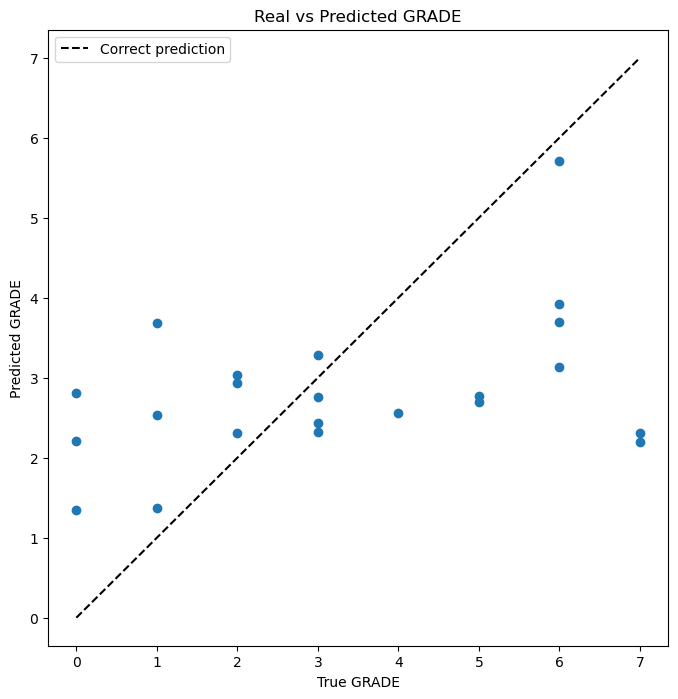

In [30]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")

plt.xlabel('True GRADE')
plt.ylabel('Predicted GRADE')
plt.title("Real vs Predicted GRADE")

plt.legend()

---
---
---

# KNN with 5 features

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# 1. Prepare data
X = student_df[['11', '22', '25', '26', '30']]  # 5 features
y = student_df['GRADE']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features (important for KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Try different K values to find the best one
k_values = [3, 5, 7, 9, 11]
best_score = -float('inf')
best_k = None

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    print(f"K={k}, R² Score: {score:.3f}")
    
    if score > best_score:
        best_score = score
        best_k = k

# 5. Train final model with best K
knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

# 6. Make predictions and evaluate
predictions = knn_final.predict(X_test_scaled)
print(f"\nFinal Model (K={best_k}):")
print(f"R² Score: {r2_score(y_test, predictions):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions)):.3f}")

# 7. For making predictions on new data
new_data = pd.DataFrame({
    '11': [1, 6],
    '22': [2, 1],
    '25': [2, 3],
    '26': [2, 3],
    '30': [3, 5]
})

new_data_scaled = scaler.transform(new_data)
new_predictions = knn_final.predict(new_data_scaled)
print("\nPredictions for new data:", new_predictions)

K=3, R² Score: -0.361
K=5, R² Score: -0.210
K=7, R² Score: -0.146
K=9, R² Score: -0.214
K=11, R² Score: -0.062

Final Model (K=11):
R² Score: -0.062
RMSE: 2.210

Predictions for new data: [2.63636364 4.09090909]
